<a href="https://colab.research.google.com/github/DanielCarrascoPerez/AAMD/blob/main/Trabajo2/Daniel_Carrasco_Perez_Trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Cargamos las librerías necesarias:

In [2]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
import seaborn as sns

Cargamos el dataset:

In [3]:
url = "https://raw.githubusercontent.com/DanielCarrascoPerez/AAMD/main/Trabajo2/Admission_Predict.csv"
#url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/Trabajo2/Admission_Predict_Ver1.1.csv"

In [4]:
dataset = pd.read_csv(url)

In [5]:
print(dataset)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

Como se muestra a continuación, no hay ningún valor nulo en los datos de estudio.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Con el heatmap, se puede ver la correlación entre las variables de estudio.

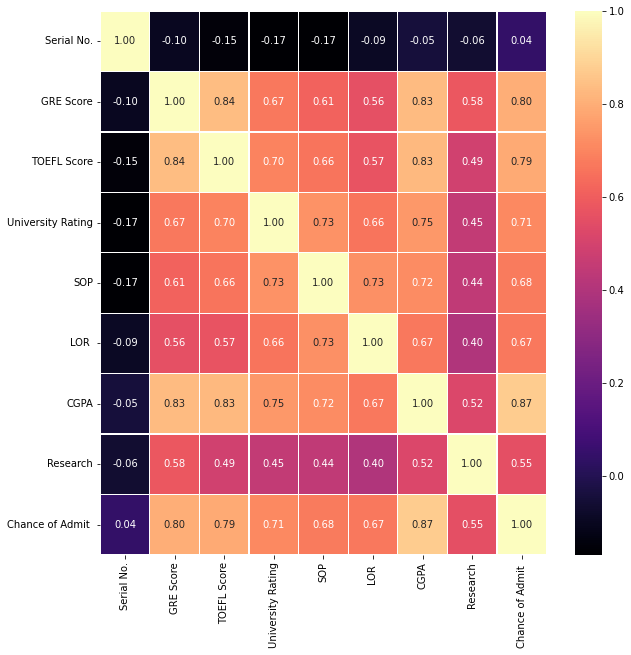

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths =0.10,fmt = '.2f',cmap='magma')

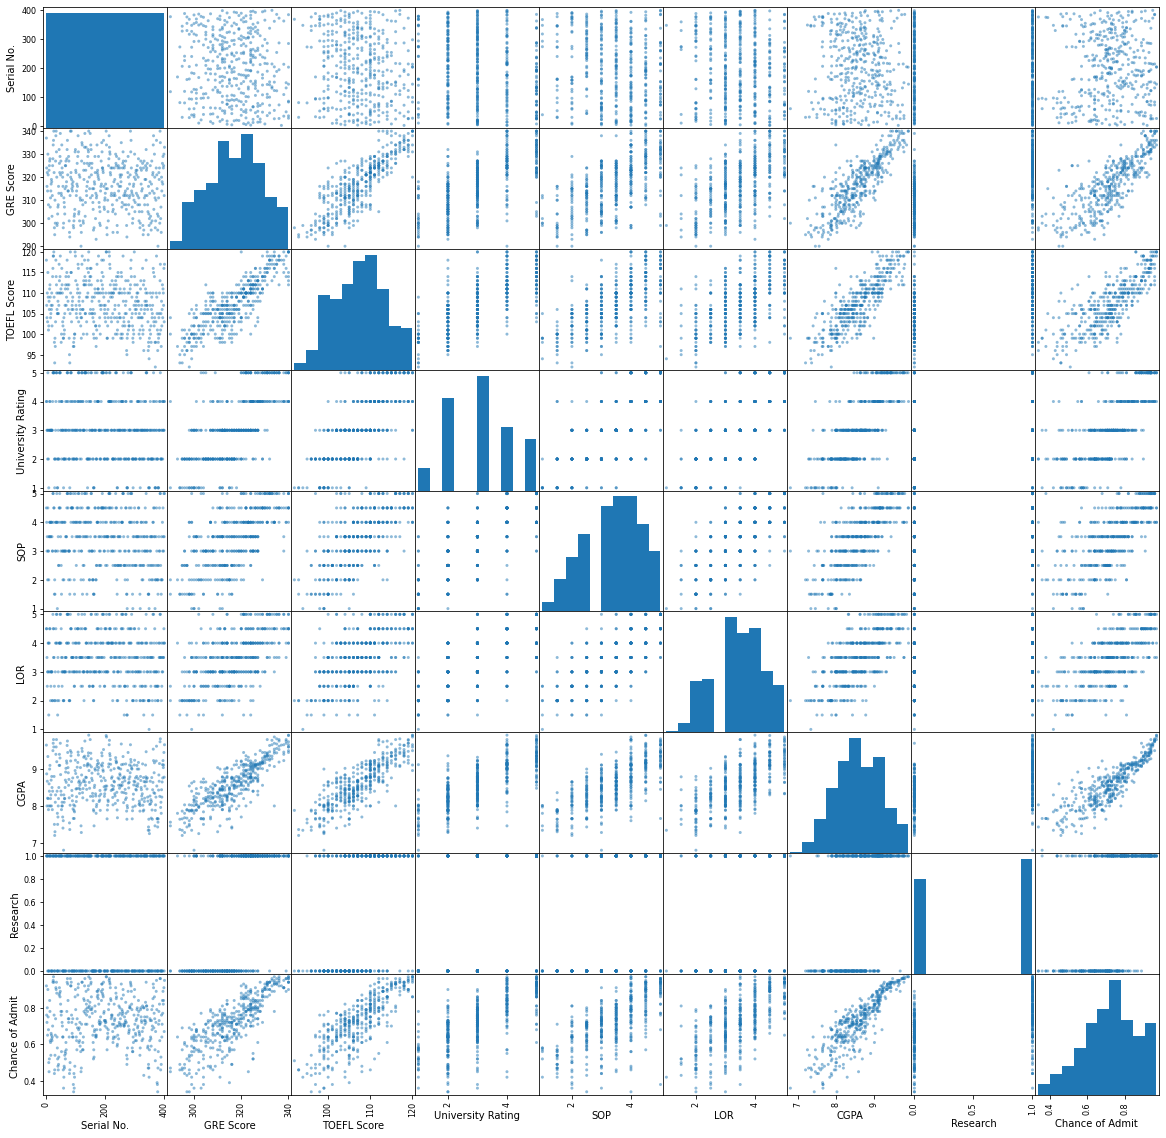

In [9]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

Nos deshacemos de la variable Serial No. por no ser útil para el estudio.

In [10]:
dataset.drop('Serial No.',axis=1,inplace=True)

Ahora discretizamos la clase Chance of Admit y las variables SOP, LOR y CGPA.

In [11]:
datos = dataset.iloc[:,-1:]
for x in range(len(datos)):
  if datos.iloc[x, 0] >= 0.60:
    datos.iloc[x, 0] = 'Yes'
  else:
    datos.iloc[x, 0] = 'No'
dataset.iloc[:,-1:] = datos
print(dataset)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

    Chance of Admit   
0                Yes  
1                Yes  
2     

In [12]:
dataset.SOP = dataset.SOP.astype(int)
dataset.iloc[:,4] = dataset.iloc[:,4].astype(int)
dataset.CGPA = dataset.CGPA.astype(int)

Dividimos el dataset en 80% de datos para entrenar y 20% para test:

In [13]:
array = dataset.values
X = array[:,0:7]
y = array[:,7]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Realizamos predicciones con el dataset de validación:

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Damos detalles sobre el modelo:

In [15]:
print(model)

DecisionTreeClassifier()


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [16]:
print(accuracy_score(Y_validation, predictions))

0.9


Ahora la matriz de confusión:

In [17]:
print(confusion_matrix(Y_validation, predictions))

[[11  7]
 [ 1 61]]


Un informe de clasificación:

In [18]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

          No       0.92      0.61      0.73        18
         Yes       0.90      0.98      0.94        62

    accuracy                           0.90        80
   macro avg       0.91      0.80      0.84        80
weighted avg       0.90      0.90      0.89        80



Predicciones de ejemplo:

In [19]:
print(model.predict([[337,	118,	4,	4,	4,	9,	1]]), dataset.iloc[0,-1])
print(model.predict([[324,	107,	4,	4,	4,	8,	1]]), dataset.iloc[1,-1])
print(model.predict([[316,	104,	3,	3,	3,	8,	1]]), dataset.iloc[2,-1])
print(model.predict([[322,	110,	3,	3,	2,	8,	1]]), dataset.iloc[3,-1])
print(model.predict([[314,	103,	2,	2,	3,	8,	0]]), dataset.iloc[4,-1])
print(model.predict([[308,	101,	2,	3,	4,	7,	0]]), dataset.iloc[5,-1])
print(model.predict([[302,	102,	1,	2,	1,	8,	0]]), dataset.iloc[8,-1])

['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['No'] No


Dibujamos el árbol:

In [20]:
from sklearn.externals.six import StringIO
import graphviz

data = tree.export_graphviz(model, out_file=None, feature_names=dataset.columns.values[0:7], class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

ModuleNotFoundError: ignored

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(model, filled=True)